## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path

import time
import sys
import os
module_path = os.path.abspath(os.path.join('..', 'utils'))


if module_path not in sys.path:
    print(f"Adding {module_path} to sys.path")
    sys.path.append(module_path)
from plot_utils import show_hist, plot_heatmap_sorted, plot_facets_sorted

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

Adding /Users/user/dev/dsa-analysis/analysis/utils to sys.path


## Data

In [3]:
# generated by:
# uv run python scripts/run_pipeline.py --start 2025-01-01 --end 2025-01-07 --ratio 0.04
samples_dir = Path('../../data/2025-01-01_2025-01-07_0.04')
sample_files = list(samples_dir.glob('sample_*.parquet'))
# Load all sample files into a single DataFrame
print(f"Found {len(sample_files)} sample files.")
start = time.time()
dfs = []
for file in sample_files:
    df = pd.read_parquet(file, engine="fastparquet")
    dfs.append(df)
    print(f"Loaded {file.name} with shape {df.shape}")
df = pd.concat(dfs, ignore_index=True)
end = time.time()
print(f"Loaded all data in {end - start:.2f} seconds.")
print(f"Combined DataFrame shape: {df.shape}")
df.shape

Found 7 sample files.
Loaded sample_2025-01-07_2025-01-07.parquet with shape (2099994, 37)
Loaded sample_2025-01-03_2025-01-03.parquet with shape (2199995, 37)
Loaded sample_2025-01-04_2025-01-04.parquet with shape (2029653, 37)
Loaded sample_2025-01-02_2025-01-02.parquet with shape (2299987, 37)
Loaded sample_2025-01-05_2025-01-05.parquet with shape (2300005, 37)
Loaded sample_2025-01-06_2025-01-06.parquet with shape (2200013, 37)
Loaded sample_2025-01-01_2025-01-01.parquet with shape (1800000, 37)
Loaded all data in 24.74 seconds.
Combined DataFrame shape: (14929647, 37)


(14929647, 37)

## Sample statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14929647 entries, 0 to 14929646
Data columns (total 37 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   uuid                              object  
 1   decision_visibility               object  
 2   decision_visibility_other         object  
 3   end_date_visibility_restriction   object  
 4   decision_monetary                 object  
 5   decision_monetary_other           float64 
 6   end_date_monetary_restriction     object  
 7   decision_provision                object  
 8   end_date_service_restriction      object  
 9   decision_account                  object  
 10  end_date_account_restriction      object  
 11  account_type                      object  
 12  decision_ground                   object  
 13  decision_ground_reference_url     object  
 14  illegal_content_legal_ground      object  
 15  illegal_content_explanation       object  
 16  incompatible_con

In [25]:
df.columns

Index(['uuid', 'decision_visibility', 'decision_visibility_other',
       'end_date_visibility_restriction', 'decision_monetary',
       'decision_monetary_other', 'end_date_monetary_restriction',
       'decision_provision', 'end_date_service_restriction',
       'decision_account', 'end_date_account_restriction', 'account_type',
       'decision_ground', 'decision_ground_reference_url',
       'illegal_content_legal_ground', 'illegal_content_explanation',
       'incompatible_content_ground', 'incompatible_content_explanation',
       'incompatible_content_illegal', 'category', 'category_addition',
       'category_specification', 'category_specification_other',
       'content_type', 'content_type_other', 'content_language',
       'content_date', 'territorial_scope', 'application_date',
       'decision_facts', 'source_type', 'source_identity',
       'automated_detection', 'automated_decision', 'platform_name',
       'platform_uid', 'created_at'],
      dtype='object')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_decision_heatmaps(
    df: pd.DataFrame,
    platform_col: str = "platform_name",
    category_col: str = "category",
    decision_cols: list[str] = None,
    figsize: tuple[int, int] = (12, 6),
    cmap: str = "Blues",
):
    """
    Draw one heat‑map per decision column for every platform.

    Parameters
    ----------
    df : DataFrame
        Your raw data frame.
    platform_col : str
        Column holding the platform names.
    category_col : str
        Column holding the content categories.
    decision_cols : list[str] | None
        The four decision columns.  If None, defaults to the usual four.
    figsize : tuple[int, int]
        Matplotlib figure size.
    cmap : str
        Seaborn / Matplotlib colour‑map.
    """
    if decision_cols is None:
        decision_cols = [
            "decision_account",
            "decision_provision",
            "decision_monetary",
            "decision_visibility",
        ]
    for dec in decision_cols:
        df[dec] = df[dec].astype(str)  # ensure all decisions are strings

    # iterate over each platform
    for platform, df_platform in df.groupby(platform_col):
        print(f"\n► {platform}")
        try:
            for dec in decision_cols:
                # pivot: rows = category, columns = decision values, cells = counts
                pivot = (
                    df_platform
                    .pivot_table(index=category_col,
                                columns=dec,
                                values=dec,
                                aggfunc="size",
                                fill_value=0)
                    .sort_index()   # keeps categories alphabetical
                )

                plt.figure(figsize=figsize)
                sns.heatmap(
                    pivot,
                    annot=True,         # show counts
                    fmt="d",
                    linewidths=.5,
                    cmap=cmap
                )
                plt.title(f"{platform}: {dec}")
                plt.ylabel("Category")
                plt.xlabel(dec)
                plt.tight_layout()
                plt.show()
        except Exception as e:
            print(f"Error processing {platform}: {e}")
            continue


plot_decision_heatmaps(df.sample(frac=0.01, random_state=42))


► AliExpress
Error processing AliExpress: Grouper for 'decision_account' not 1-dimensional

► Amazon Store
Error processing Amazon Store: Grouper for 'decision_account' not 1-dimensional

► Badoo
Error processing Badoo: Grouper for 'decision_account' not 1-dimensional

► BlaBlaCar
Error processing BlaBlaCar: Grouper for 'decision_account' not 1-dimensional

► Booking.com
Error processing Booking.com: Grouper for 'decision_account' not 1-dimensional

► Bumble
Error processing Bumble: Grouper for 'decision_account' not 1-dimensional

► Campfire
Error processing Campfire: Grouper for 'decision_account' not 1-dimensional

► Dailymotion
Error processing Dailymotion: Grouper for 'decision_account' not 1-dimensional

► Discord Netherlands B.V.
Error processing Discord Netherlands B.V.: Grouper for 'decision_account' not 1-dimensional

► Facebook
Error processing Facebook: Grouper for 'decision_account' not 1-dimensional

► Glassdoor
Error processing Glassdoor: Grouper for 'decision_account' 

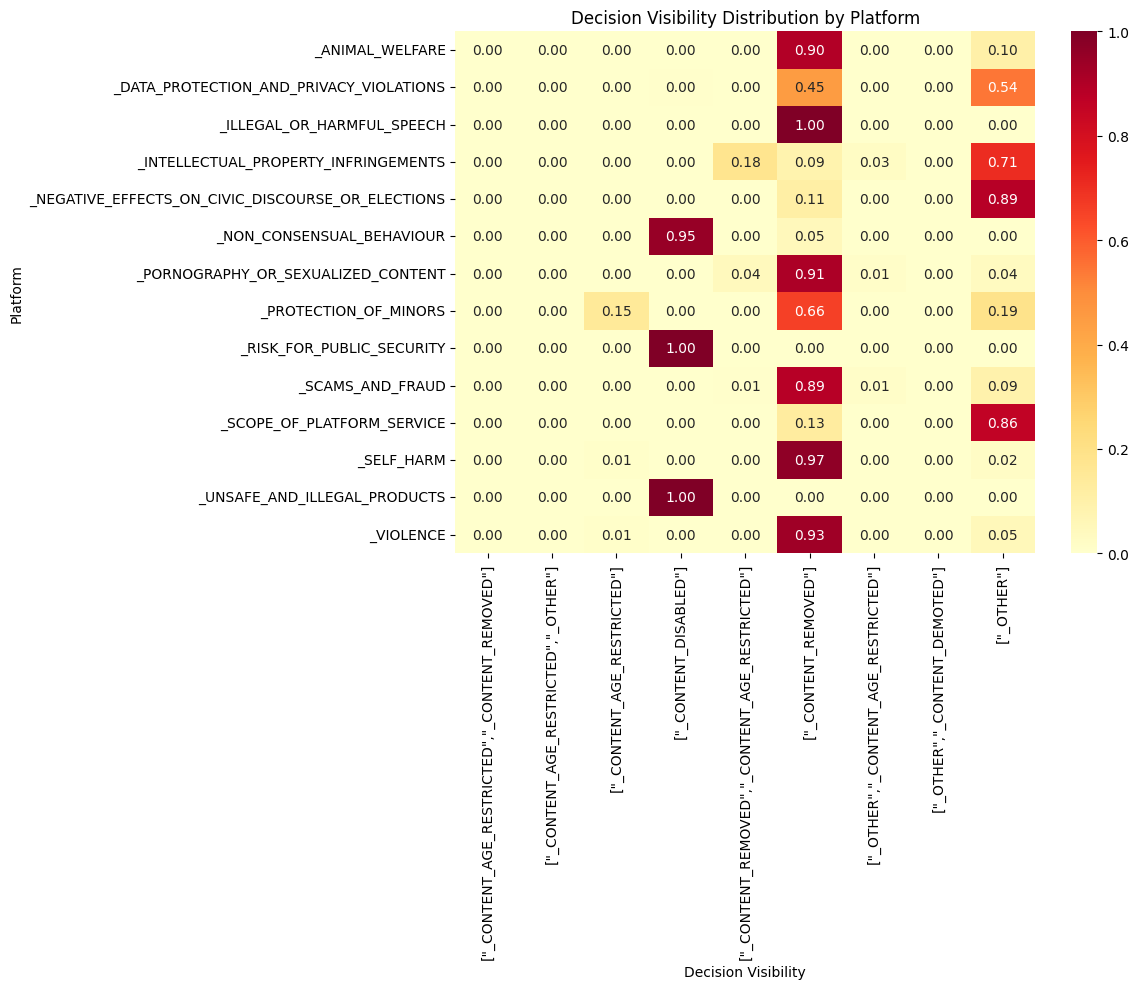

In [22]:
df_tmp = df[df["platform_name"] == "TikTok"]
col = "decision_visibility"
row = "category"
regex_col = col.upper()
regex_row = "STATEMENT_CATEGORY"
def make_heatmap(df_tmp, col, row, regex_col, regex_row):
    """
    Create a heatmap from the DataFrame based on the specified column and row.
    """
    # Filter and clean the DataFrame
    df_tmp = df_tmp[df_tmp[col].str.contains(regex_col, na=False)]
    df_tmp = df_tmp[df_tmp[row].str.contains(regex_row, na=False)]

    # Replace the values in the specified columns
    df_tmp[col] = df_tmp[col].str.replace(regex_col, "", regex=True)
    df_tmp[row] = df_tmp[row].str.replace(regex_row, "", regex=True)
    pivot_data = (df_tmp.groupby([row, col])
                  .size()
                  .unstack(fill_value=0)
                  .div(df_tmp.groupby(row).size(), axis=0))
    pivot_data = pivot_data.sort_index(axis=1, key=lambda x: x.str.lower())

    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title(f"{col.replace('_', ' ').title()} Distribution by Platform")
    plt.ylabel("Platform")
    plt.xlabel(col.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

    # return df_tmp

make_heatmap(df_tmp, col, row, regex_col, regex_row)
